# Time Sereies Analysis with Python and Darts

Darts is a Python library for user-friendly forecasting and anomaly detection on time series. It contains a variety of models, from classics such as ARIMA to deep neural networks.

The forecasting models can all be used in the same way, using `fit()` and `predict()` functions, similar to scikit-learn. The library also makes it easy to backtest models, combine the predictions of several models, and take external data into account. Darts supports both univariate and multivariate time series and models. The ML-based models can be trained on potentially large datasets containing multiple time series, and some of the models offer a rich support for probabilistic forecasting.

Darts also offers extensive anomaly detection capabilities. For instance, it is trivial to apply PyOD models on time series to obtain anomaly scores, or to wrap any of Darts forecasting or filtering models to obtain fully fledged anomaly detection models.

In [16]:
# Linear Regression
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Darts library for time series analysis
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.datasets import ETTh2Dataset
from darts.ad import KMeansScorer, QuantileDetector

# Time Series Object Creation

Create a TimeSeries object from a Pandas DataFrame, and split it in train/validation series:


In [4]:
from darts import TimeSeries

# Read a pandas DataFrame
df = pd.read_csv("AirPassengers.csv", delimiter=",")

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "Month", "#Passengers")

# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

Fit an exponential smoothing model, and make a (probabilistic) prediction over the validation series’ duration

In [11]:
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=100)

Plot median, 5th and 95th percentiles of the prediction, and the validation series.

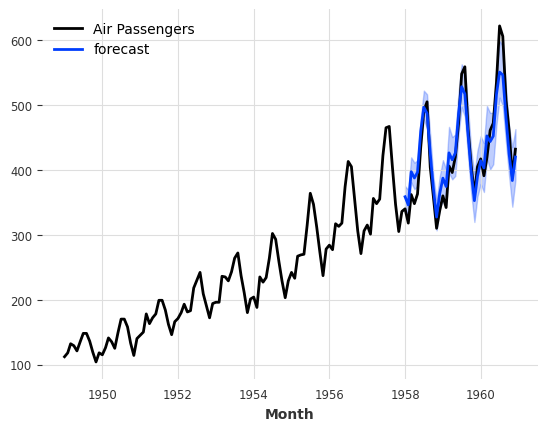

In [13]:
series.plot(label="Air Passengers")
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

# Multivariate Series Example

Load a multivariate series, trim it, keep 2 components, split train and validation sets

In [15]:
series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = series.split_before(0.6)

Build a K means anomaly detection model, fit it on the training set, and make a prediction on the validation set

In [18]:
scorer = KMeansScorer()
scorer.fit(train)
anomaly_scores = scorer.score(val)

# Binary Anomaly Detection

Build a binary anomaly detector and train it over train scores, then use it over validation scores to get binary anomaly classification.

In [22]:
detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anomaly = detector.detect(anomaly_scores)

# Plot Output

<Axes: xlabel='date'>

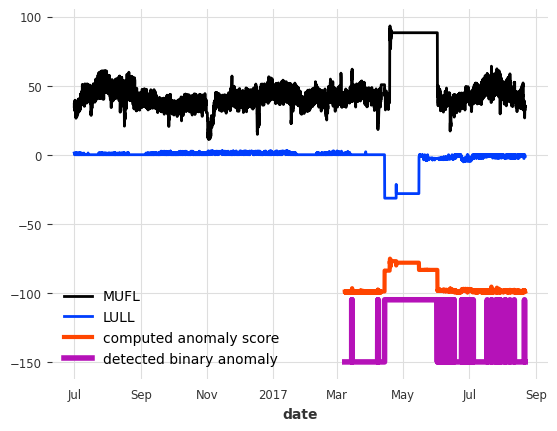

In [23]:
series.plot()
(anomaly_scores / 2.0 - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anomaly * 45 - 150).plot(label="detected binary anomaly", lw=4)